In [88]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

# Differentiation Problem Set

Problem 1

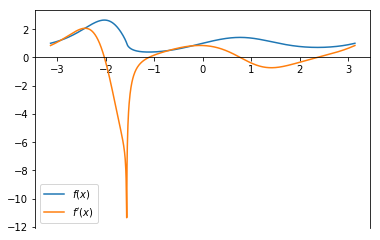

In [57]:
def function_diff():
    x = sy.symbols('x')
    fx = (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_primex = sy.diff(fx, x)
    f_primex1 = sy.lambdify(x, f_primex, "numpy")
    fx = sy.lambdify(x, fx, "numpy")
    return fx, f_primex1

fx, f_primex1= function_diff()
x = np.linspace(-np.pi, np.pi, 1000)
f_x = fx(x)
f_prime =f_primex1(x)
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.plot(x, f_x, label = '$f(x)$')
plt.plot(x, f_prime, label = '$f^\prime(x)$')
plt.legend()
plt.show()



Problem 2

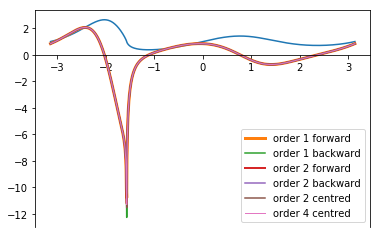

In [58]:
def finite_diff(x, h):
    forward_1 = (f(x+h) - f(x))/h
    forward_2 = (-3*f(x)+ 4*f(x+h) - f(x+2*h))/(2*h)
    backward_1 = (f(x) - f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+ f(x-2*h))/(2*h)
    centred_2 = (f(x+h) - f(x-h))/(2*h)
    centred_4 = (f(x-2*h) - 8*f(x-h)+8*f(x+h) - f(x+2*h))/(12*h)
    return forward_1, forward_2, backward_1, backward_2, centred_2, centred_4    

def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

x = np.linspace(-np.pi, np.pi, 1000)
forward_1, forward_2, backward_1, backward_2, centred_2, centred_4 = finite_diff(x, 1e-3)
plt.plot(x, f(x))
plt.plot(x,forward_1, linewidth=3, label = 'order 1 forward')
plt.plot(x, backward_1, label = 'order 1 backward')
plt.plot(x, forward_2, linewidth =2, label='order 2 forward')
plt.plot(x, backward_2 , label = 'order 2 backward')
plt.plot(x, centred_2, label = 'order 2 centred')
plt.plot(x, centred_4, linewidth = 1, label= 'order 4 centred')
plt.legend()
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
plt.show()


Problem 3

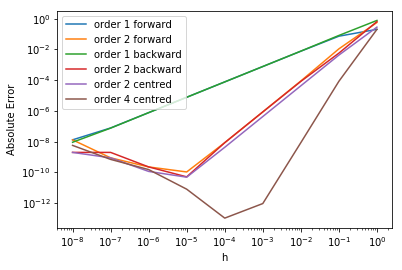

In [63]:
def f(x):
    f = (np.sin(x)+1)**(np.sin(np.cos(x)))
    return f

def exact_deriv():
    x = sy.symbols('x')
    fx = (sy.sin(x)+1)**sy.sin(sy.cos(x))
    f_primex = sy.diff(fx, x)
    f_primex1 = sy.lambdify(x, f_primex, "numpy")
    fx = sy.lambdify(x, fx, "numpy")
    return fx, f_primex1

def approx_deriv(x, h):
    forward_1 = (f(x+h) - f(x))/h
    forward_2 = (-3*f(x)+ 4*f(x+h) - f(x+2*h))/(2*h)
    backward_1 = (f(x) - f(x-h))/h
    backward_2 = (3*f(x)-4*f(x-h)+ f(x-2*h))/(2*h)
    centred_2 = (f(x+h) - f(x-h))/(2*h)
    centred_4 = (f(x-2*h) - 8*f(x-h)+8*f(x+h) - f(x+2*h))/(12*h)
    return forward_1, forward_2, backward_1, backward_2, centred_2, centred_4

h = np.logspace(-8, 0, 9)
x = 1.0
fx, f_primex1 = exact_deriv()
exact = f_primex1(1)
forward_1, forward_2, backward_1, backward_2, centred_2, centred_4 = approx_deriv(1,h)
error_vec = np.array([np.abs(forward_1- exact), np.abs(forward_2 - exact), np.abs(backward_1- exact),
                    np.abs(backward_2- exact), np.abs(centred_2- exact), np.abs(centred_4- exact)])

plt.plot(h, error_vec[0], label='order 1 forward')
plt.plot(h, error_vec[1], label = 'order 2 forward')
plt.plot(h, error_vec[2], label= 'order 1 backward')
plt.plot(h, error_vec[3], label = 'order 2 backward')
plt.plot(h, error_vec[4], label = 'order 2 centred')
plt.plot(h, error_vec[5], label = 'order 4 centred')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.show()


    
    
    
    

Problem 4

In [60]:
data = np.load('plane.npy')
t = data[:,0]
alpha = data[:,1]
beta = data[:,2]
alpha_deg = np.deg2rad(alpha)
beta_deg = np.deg2rad(beta)

a =500
x_t = a*(np.tan(beta_deg)/(np.tan(beta_deg) - np.tan(alpha_deg)))
y_t = a*((np.tan(beta_deg)*np.tan(alpha_deg))/(np.tan(beta_deg) - np.tan(alpha_deg)))

x_prime = np.zeros(len(x_t))
y_prime = np.zeros(len(y_t))

for i in range(1,7):
    x_prime[i] = (x_t[i+1] - x_t[i-1])/2
    y_prime[i] = (y_t[i+1] - y_t[i-1])/2
x_prime[0] = x_t[1] - x_t[0]
y_prime[0] = y_t[1] - y_t[0]
x_prime[-1] = (x_t[-1] - x_t[-2])
y_prime[-1] = (y_t[-1] - y_t[-2])

speed = (((x_prime)**2) + ((y_prime)**2))**(1/2)
print('speed in m/sec for time t=7 to t=14 is: ', speed)

speed in m/sec for time t=7 to t=14 is:  [46.42420062 47.00103938 48.99880514 50.09944163 48.29035084 51.56455905
 53.92303355 51.51480057]


Problem 5

In [81]:
def f(xvec):
    f_1 = xvec[0]**2
    f_2 = xvec[0]**3 - xvec[1]
    f = (f_1, f_2)
    return f

def jacobian(xvec, h):
    dim_x = len(xvec)
    dim_y = len(f(xvec))
    jacobian = np.empty((dim_y, dim_x))
    basis_matrix = np.identity(dim_x)
    for i in range(dim_y):
        for j in range(dim_x):
            e_j = basis_matrix[:,j]
            jacobian[i,j] = (f(xvec+h*e_j)[i]- f(xvec-h*e_j)[i])/(2*h)
    return jacobian


xvec = (1,3)
jacobian(xvec, 1e-3)

array([[ 2.      ,  0.      ],
       [ 3.000001, -1.      ]])

Problem 6

In [115]:
def chebyshev(x, n):
    cheb_full = []
    for count,value in enumerate(x):
        cheb = anp.zeros(n+1)
        cheb[0] = 1
        cheb[1] = value
        for i in range(2,n+1):
            cheb[i] = 2*value*cheb[i-1] - cheb[i-2]
        cheb_full.append(cheb)
    return cheb_full

x = anp.linspace(1,10,10)
chebyshev(x,4)


# dg = elementwise_grad(chebyshev)
# x = anp.linspace(1,10,10)
# dg(x,3)


[array([1., 1., 1., 1., 1.]),
 array([ 1.,  2.,  7., 26., 97.]),
 array([  1.,   3.,  17.,  99., 577.]),
 array([1.000e+00, 4.000e+00, 3.100e+01, 2.440e+02, 1.921e+03]),
 array([1.000e+00, 5.000e+00, 4.900e+01, 4.850e+02, 4.801e+03]),
 array([1.0000e+00, 6.0000e+00, 7.1000e+01, 8.4600e+02, 1.0081e+04]),
 array([1.0000e+00, 7.0000e+00, 9.7000e+01, 1.3510e+03, 1.8817e+04]),
 array([1.0000e+00, 8.0000e+00, 1.2700e+02, 2.0240e+03, 3.2257e+04]),
 array([1.0000e+00, 9.0000e+00, 1.6100e+02, 2.8890e+03, 5.1841e+04]),
 array([1.0000e+00, 1.0000e+01, 1.9900e+02, 3.9700e+03, 7.9201e+04])]

In [125]:
def chebyshev(x, n):
    cheb_full = anp.zeros(len(x))
    for count,value in enumerate(x):
        cheb = anp.zeros(n+1)
        cheb[0] = anp.ones_like(x)
        cheb[1] = value*anp.ones_like(x)
        for i in range(2,n+1):
            cheb[i] = 2*value*cheb[i-1] - cheb[i-2]
            cheb_full[count] = cheb[i]
    return cheb_full

x = anp.linspace(1,10,10)
chebyshev(x,4)

dg = elementwise_grad(chebyshev)
x = anp.linspace(1,10,10)
dg(x,3)
    

ValueError: setting an array element with a sequence.

In [126]:
def chebyshev(x, n):
    t = anp.zeros(n+1)
    t[0] = anp.ones_like(x)
    t[1] = x*anp.ones_like(x)
    for i in range(2,n+1):
        t[i]=2*x*t[i-1] -t[i-2]
    return anp.float(t[-1])

dg = elementwise_grad(chebyshev)
x = anp.array([1,2,3], dtype=anp.float)
dg(x,3)  


ValueError: setting an array element with a sequence.